<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/OSMX_12_Download_any_OSM_Geospatial_attributes_with_OSMnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [2]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.2'

In [3]:
# get all building footprints in some neighborhood
# `True` means retrieve any object with this tag, regardless of value
place = "Bunker Hill, Los Angeles, California"
tags = {"building": True}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(56, 47)

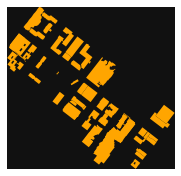

In [4]:
fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [5]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"leisure": "park"}
gdf = ox.geometries_from_place(place, tags)
gdf.shape

(1, 4)

In [6]:
# get everything tagged amenity,
# and everything tagged landuse = retail or commercial,
# and everything tagged highway = bus_stop
tags = {"amenity": True, "landuse": ["retail", "commercial"], "highway": "bus_stop"}
gdf = ox.geometries_from_place("Piedmont, California, USA", tags)
gdf.shape

(130, 60)

In [7]:
# view just the banks
gdf[gdf["amenity"] == "bank"].dropna(axis=1, how="any")

amenity  ...     brand:wikipedia
element_type osmid               ...                    
node         2810181540    bank  ...         en:Citibank
way          276424028     bank  ...  en:Bank of America
             285549437     bank  ...      en:Wells Fargo

[3 rows x 6 columns]

In [8]:
# view just the bus stops
gdf[gdf["highway"] == "bus_stop"].dropna(axis=1, how="any").head()

name  ... route_ref
element_type osmid                                           ...          
node         4071030440  Park Boulevard & Saint James Drive  ...  V;33;688
             5844909127      Park Boulevard & Estates Drive  ...  V;33;688
             5845148873     Hampton Road & Sandringham Road  ...        33
             5845152990     Hampton Road & Sandringham Road  ...        33
             5845153014       Hampton Road & Seaview Avenue  ...        33

[5 rows x 8 columns]